In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
keras.backend.clear_session()
tf.random.set_seed(42)

In [3]:
tf.__version__

'2.1.0'

In [4]:
keras.__version__

'2.2.4-tf'

# Prepare data 

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Ankle boot')

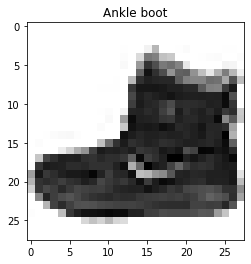

In [7]:
plt.imshow(X_train_full[0].reshape(28,28), cmap="binary")
plt.title(class_names[y_train_full[0]])

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

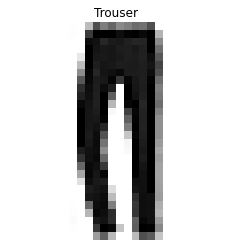

In [9]:
plt.imshow(X_test[2], cmap="binary")
plt.title(class_names[y_test[2]])
plt.axis('off')
plt.show()

# Train with Sequential API

In [10]:
model = keras.models.Sequential()

In [11]:
model.add(keras.layers.Flatten(input_shape=[28,28]))

In [12]:
model.add(keras.layers.Dense(300, activation=keras.activations.relu))

In [13]:
model.add(keras.layers.Dense(100, activation=keras.activations.relu))

In [14]:
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 48us/sample - loss: 0.7226 - accuracy: 0.7641 - val_loss: 0.5073 - val_accuracy: 0.8320
Epoch 2/30
55000/55000 [==============================] - 2s 45us/sample - loss: 0.4843 - accuracy: 0.8323 - val_loss: 0.4541 - val_accuracy: 0.8484
Epoch 3/30
55000/55000 [==============================] - 2s 44us/sample - loss: 0.4412 - accuracy: 0.8465 - val_loss: 0.4387 - val_accuracy: 0.8490
Epoch 4/30
55000/55000 [==============================] - 2s 45us/sample - loss: 0.4128 - accuracy: 0.8548 - val_loss: 0.4149 - val_accuracy: 0.8568
Epoch 5/30
55000/55000 [==============================] - 2s 45us/sample - loss: 0.3925 - accuracy: 0.8617 - val_loss: 0.3813 - val_accuracy: 0.8642
Epoch 6/30
55000/55000 [==============================] - 2s 45us/sample - loss: 0.3768 - accuracy: 0.8662 - val_loss: 0.3728 - val_accuracy: 0.8682
Epoch 7/30
55000/55000 [==============================] -

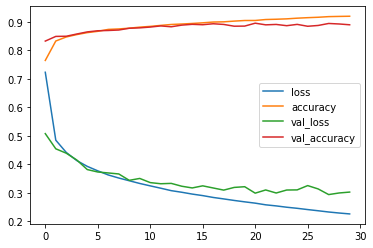

In [18]:
pd.DataFrame(history.history).plot()

In [19]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.3351 - accuracy: 0.8791


[0.33506615144014357, 0.8791]

## Make predictions

In [28]:
sample_inputs = X_test[100:105]
sample_labels = y_test[100:105]

In [30]:
np.array(class_names)[sample_labels]

array(['Dress', 'Shirt', 'Sneaker', 'Pullover', 'Sneaker'], dtype='<U11')

In [34]:
model.predict(sample_inputs).round(2)

array([[0.01, 0.  , 0.  , 0.98, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.14, 0.  , 0.35, 0.02, 0.01, 0.  , 0.47, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
sample_pred_labels = model.predict_classes(sample_inputs)

In [46]:
f"Actual: {np.array(class_names)[sample_labels]}. Predict: {np.array(class_names)[sample_pred_labels]}"

"Actual: ['Dress' 'Shirt' 'Sneaker' 'Pullover' 'Sneaker']. Predict: ['Dress' 'Shirt' 'Sneaker' 'Shirt' 'Sneaker']"

# Regression MLP 

In [77]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [78]:
housing = fetch_california_housing()

In [79]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [80]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [81]:
scaler = StandardScaler()

In [82]:
X_train = scaler.fit_transform(X_train)

In [83]:
X_valid = scaler.fit_transform(X_valid)

In [84]:
X_test = scaler.fit_transform(X_test)

## Create model

In [85]:
clf_model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [86]:
clf_model.compile(loss="mean_squared_error", optimizer="sgd")

In [87]:
history = clf_model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.8418 - val_loss: 0.5642
Epoch 2/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4870 - val_loss: 0.4946
Epoch 3/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4372 - val_loss: 0.4757
Epoch 4/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.4765 - val_loss: 0.4875
Epoch 5/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4295 - val_loss: 0.4578
Epoch 6/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4063 - val_loss: 0.4424
Epoch 7/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.3985 - val_loss: 0.4399
Epoch 8/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.3932 - val_loss: 0.4425
Epoch 9/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.3884 - val_l

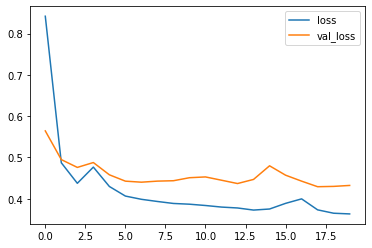

In [88]:
pd.DataFrame(history.history).plot()

In [89]:
clf_model.predict(X_test[:10])

array([[2.2161765],
       [1.1232815],
       [3.3215108],
       [3.0543246],
       [1.7466418],
       [1.2738466],
       [2.6657372],
       [2.7376618],
       [2.3028955],
       [2.8015277]], dtype=float32)

In [90]:
y_test[:10]

array([1.738, 1.539, 3.781, 2.5  , 0.948, 1.105, 2.32 , 2.727, 1.571,
       4.797])

## Complex Regression Model using Functional API

In [91]:
# Wide and Deep network

In [92]:
input_ = keras.layers.Input(shape=X_train.shape[1:])

In [94]:
hidden1 = keras.layers.Dense(30, activation="relu")(input_)

In [95]:
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

In [98]:
concat = keras.layers.Concatenate()([input_, hidden2])

In [99]:
output = keras.layers.Dense(1)(concat)

In [102]:
model = keras.Model(inputs=[input_], outputs=[output])

In [103]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 30)           930         dense_13[0][0]                   
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_1[0][0]                    
                                                                 dense_14[0][0]               

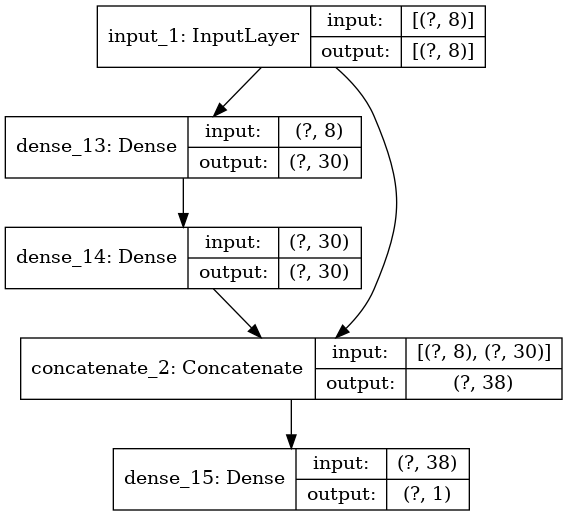

In [104]:
keras.utils.plot_model(model, 'mini_resnet.png', show_shapes=True)

## With subset of features for input

In [106]:
input_a = keras.layers.Input(shape=[5], name="wide_input")

In [107]:
input_b = keras.layers.Input(shape=[6], name="deep_input")

In [108]:
hidden1 = keras.layers.Dense(30, activation="relu")(input_b)

In [109]:
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

In [110]:
concat = keras.layers.Concatenate()([input_a, hidden2])

In [111]:
output = keras.layers.Dense(1, name="output")(concat)

In [112]:
model = keras.Model(inputs=[input_a, input_b], outputs=[output])

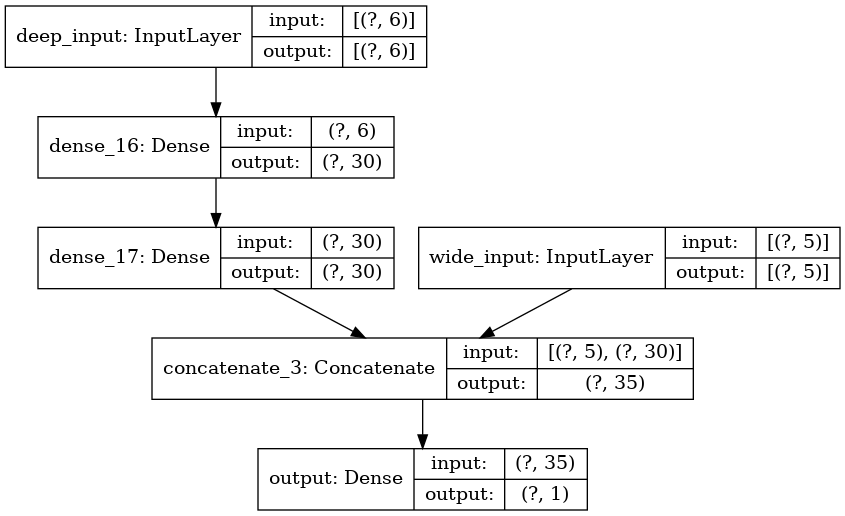

In [113]:
keras.utils.plot_model(model, 'mini_resnet.png', show_shapes=True)

### Prepare data

In [115]:
X_train_a, X_train_b = X_train[:, :5], X_train[:, 2:]

In [117]:
X_train_a.shape, X_train_b.shape

((11610, 5), (11610, 6))

In [118]:
X_valid_a, X_valid_b = X_valid[:, :5], X_valid[:, 2:]

In [119]:
X_test_A, X_test_b = X_test[:, :5], X_test[:, 2:]

In [121]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [122]:
history = model.fit((X_train_a, X_train_b), y_train, epochs=20, validation_data=((X_test_A, X_test_b), y_test))

Train on 11610 samples, validate on 5160 samples
Epoch 1/20
11610/11610 [==============================] - 1s 47us/sample - loss: 2.1170 - val_loss: 0.9233
Epoch 2/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.7912 - val_loss: 0.7174
Epoch 3/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.6792 - val_loss: 0.6563
Epoch 4/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.6352 - val_loss: 0.6208
Epoch 5/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.6034 - val_loss: 0.5990
Epoch 6/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5804 - val_loss: 0.5806
Epoch 7/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5622 - val_loss: 0.5643
Epoch 8/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5404 - val_loss: 0.5545
Epoch 9/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5263 - val_l

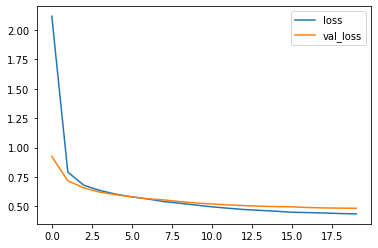

In [123]:
pd.DataFrame(history.history).plot()